In [24]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [26]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [27]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df)

In [28]:
# Create a DataFrame with the scaled data
market_data_transformed_df = pd.DataFrame(market_data_df_scaled)
###market_data_transformed_df.head(10)
###market_data_transformed_df = df.concat(market_data_df["coin_id"], market_data_transformed_df)

# Copy the crypto names from the original data
market_data_transformed_df["coin_id"] = market_data_df.iloc[:, 0]
###market_data_transformed_df['coin_id'] = market_data_df['coin_id']
                                                               
###market_data_transformed_df

# Set the coinid column as index
###df.set_index("coin_id", inplace=True)
###market_data_transformed_df.loc['coin_id'].set_index['coinid']
market_data_transformed_df.set_index("coin_id", inplace=True)

# Display sample data
print(market_data_transformed_df.head())

                0         1         2         3         4         5         6
coin_id                                                                      
NaN      0.508529  0.493193  0.772200  0.235460 -0.067495 -0.355953 -0.251637
NaN      0.185446  0.934445  0.558692 -0.054341 -0.273483 -0.115759 -0.199352
NaN      0.021774 -0.706337 -0.021680 -0.061030  0.008005 -0.550247 -0.282061
NaN     -0.040764 -0.810928  0.249458 -0.050388 -0.373164 -0.458259 -0.295546
NaN      1.193036  2.000959  1.760610  0.545842 -0.291203 -0.499848 -0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [29]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(market_data_transformed_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-pa

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

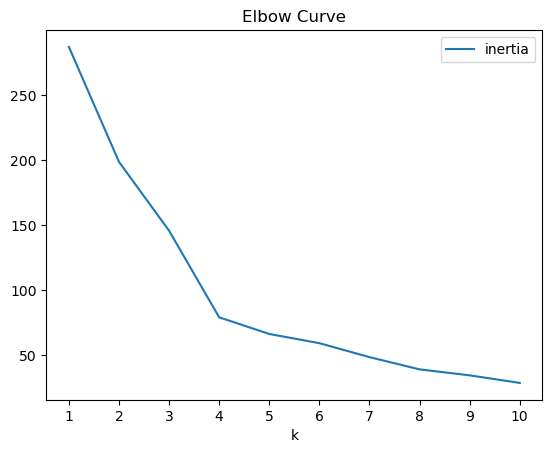

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x = 'k',
                   y = 'inertia',
                   title = 'Elbow Curve',
                    xticks = k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best k is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [30]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4, random_state = 1 )

In [31]:
# Fit the K-Means model using the scaled data
model.fit(market_data_transformed_df)

C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(market_data_transformed_df)
###market_data_transformed_predictions_df = market_data_transformed_df.copy()
# View the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [33]:
# Create a copy of the DataFrame
market_data_transformed_predictions_df = market_data_transformed_df.copy()

In [36]:
# Add a new column to the DataFrame with the predicted clusters
market_data_transformed_predictions_df['predicted_clusters'] = k_4

# Display sample data
market_data_transformed_predictions_df

,0,1,2,3,4,5,6,predicted_clusters
coin_id,,,,,,,,
NaN,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
NaN,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
NaN,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
NaN,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
NaN,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
NaN,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
NaN,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
NaN,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
NaN,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

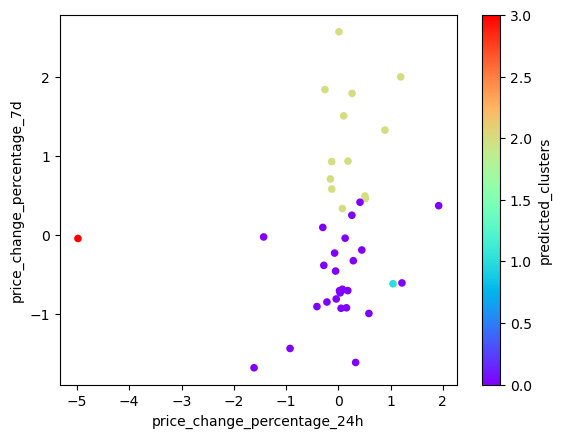

In [49]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_transformed_predictions_df[['price_change_percentage_24h', 'price_change_percentage_7d']] = market_data_transformed_predictions_df.iloc[:, [0, 1]]
market_data_transformed_predictions_df.plot.scatter( 
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = 'predicted_clusters',
    colormap = 'rainbow')

### Optimize Clusters with Principal Component Analysis.

In [51]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [52]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_df_scaled_pca = pca.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame. 
market_data_df_scaled_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [53]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 + 0.34700813 + 0.17603793 ~= 0.895 = 89.5%

In [58]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
        market_data_df_scaled_pca,
        columns = ['PCA1', 'PCA2', 'PCA3']
)
# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = market_data_df.iloc[:, 0]

# Set the coinid column as index
market_data_pca_df.set_index("coin_id", inplace=True)

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
NaN,-0.600667,0.842760,0.461595
NaN,-0.458261,0.458466,0.952877
NaN,-0.433070,-0.168126,-0.641752
NaN,-0.471835,-0.222660,-0.479053
NaN,-1.157800,2.041209,1.859715
NaN,-0.516534,1.388377,0.804071
NaN,-0.450711,0.517699,2.846143
NaN,-0.345600,0.729439,1.478013
NaN,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [59]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model= KMeans(n_clusters = i, random_state =0)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-pa

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

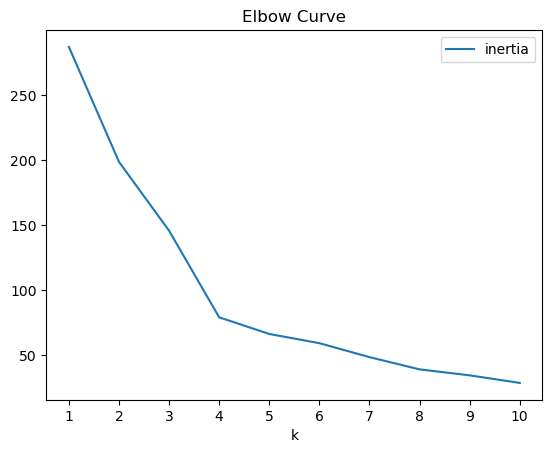

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x = 'k',
    y = 'inertia',
    title = 'Elbow Curve',
    xticks = k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No difference

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [60]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [61]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

C:\Users\des9231\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [62]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(k_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [74]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predictions_df['arket_data_predictions'] = k_4

# Display sample data
market_data_pca_predictions_df.head()

,PCA1,PCA2,PCA3,arket_data_predictions
coin_id,,,,
NaN,-0.600667,0.842760,0.461595,2
NaN,-0.458261,0.458466,0.952877,2
NaN,-0.433070,-0.168126,-0.641752,0
NaN,-0.471835,-0.222660,-0.479053,0
NaN,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

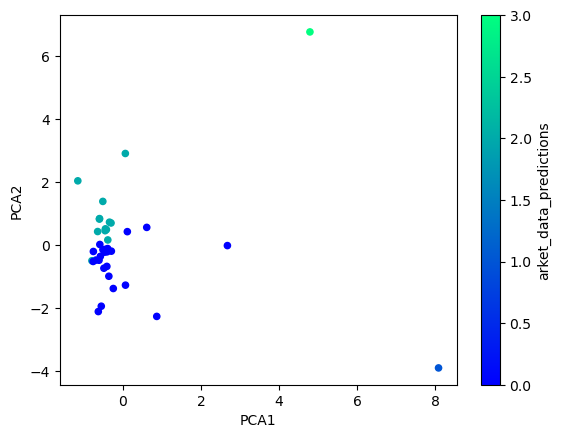

In [75]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_data_pca_predictions_df.plot.scatter(
    x = 'PCA1',
    y = 'PCA2',
    c = 'arket_data_predictions',
    colormap = 'winter')

### Determine the Weights of Each Feature on each Principal Component

In [82]:
# Use the columns from the original scaled DataFrame as the index.
###pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=market_data_pca_df.columns)
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_transformed_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
0,-0.416728,0.358162,-0.218795
1,-0.102432,0.227432,0.787670
2,-0.009162,0.540415,0.349534
3,0.191523,0.562182,-0.181744
4,0.320365,0.434040,-0.361377
5,0.594468,0.027735,0.039733
6,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The 6th feature (price_change_percentage_200d) and the 1st feature (price_change_percentage_24h) has the strongest positive and negative influence separately to PCA1; the 4th feature (price_change_percentage_30d) and the 7th feature (price_change_percentage_1y) has the strongest positive and negtive influence separately to PCA2; the 2nd feature (price_change_percentage_7d) and the 5th feature (price_change_percentage_60d) has the strongest positive and negative influence separately to PCA3.
    